<a href="https://colab.research.google.com/github/fahisa-p-m/data-science/blob/main/irrigation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#
importing required libraries






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#
creating dataframe

In [ ]:
df=pd.read_csv("/content/irrigation.csv")
df

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
...,...,...,...,...
195,cotton,941,13,1
196,cotton,902,45,1
197,cotton,894,42,1
198,cotton,1022,45,1


In [ ]:
df.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [ ]:
df.tail()

,crop,moisture,temp,pump
195,cotton,941,13,1
196,cotton,902,45,1
197,cotton,894,42,1
198,cotton,1022,45,1
199,cotton,979,10,1


In [ ]:
df.columns

Index(['crop', 'moisture', 'temp', 'pump'], dtype='object')

In [ ]:
df.isna().sum()

crop        0
moisture    0
temp        0
pump        0
dtype: int64

In [ ]:
df.dtypes

crop        object
moisture     int64
temp         int64
pump         int64
dtype: object

In [ ]:
df['crop'].value_counts()


cotton    200
Name: crop, dtype: int64

#
since there is only one type of crop crop, the presence of 'crop' column doesnt effect the model. so we may drop 'crop' column

In [ ]:
df=df.drop(['crop'],axis=1)
df

,moisture,temp,pump
0,638,16,1
1,522,18,1
2,741,22,1
3,798,32,1
4,690,28,1
...,...,...,...
195,941,13,1
196,902,45,1
197,894,42,1
198,1022,45,1


#
graphical visualization

1    150
0     50
Name: pump, dtype: int64


Text(0.5, 1.0, 'distribution of crops requiring irrigation')

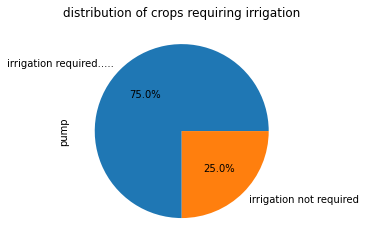

In [ ]:
pump=df['pump'].value_counts()
print(pump)
pump.plot.pie(labels={'irrigation required.....','irrigation not required'},autopct='%1.1f%%')
plt.title("distribution of crops requiring irrigation")

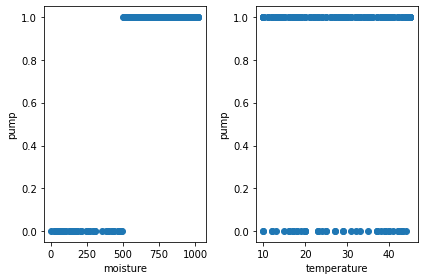

In [ ]:
plt.subplot(1,2,1)
x1=df['moisture']
x2=df['temp']
y=df['pump']
plt.scatter(x1,y)
plt.xlabel("moisture")
plt.ylabel("pump")
plt.subplot(1,2,2)
plt.scatter(x2,y)
plt.xlabel("temperature")
plt.ylabel("pump")
plt.tight_layout()

#
now we may define x(input) and y(ouput) from the dataframe df

In [ ]:
x=df.iloc[:,:-1].values
x

array([[ 638,   16],
       [ 522,   18],
       [ 741,   22],
       [ 798,   32],
       [ 690,   28],
       [ 558,   23],
       [ 578,   12],
       [ 673,   35],
       [ 642,   45],
       [ 723,   11],
       [ 671,   23],
       [ 758,   34],
       [ 507,   45],
       [ 586,   33],
       [ 703,   45],
       [ 716,   25],
       [ 724,   11],
       [ 828,   41],
       [ 633,   23],
       [ 783,   18],
       [ 635,   36],
       [ 525,   33],
       [ 636,   24],
       [ 813,   15],
       [ 736,   44],
       [ 833,   13],
       [ 808,   29],
       [ 714,   14],
       [ 806,   28],
       [ 681,   31],
       [ 661,   35],
       [ 546,   32],
       [ 759,   10],
       [ 803,   21],
       [ 670,   22],
       [ 796,   21],
       [ 665,   32],
       [ 687,   11],
       [ 573,   13],
       [ 812,   38],
       [ 698,   45],
       [ 675,   39],
       [ 700,   38],
       [ 749,   38],
       [ 537,   44],
       [ 748,   27],
       [ 824,   37],
       [ 839,

In [ ]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#
spliting into training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 999,   30],
       [ 837,   30],
       [ 546,   32],
       [ 507,   45],
       [ 796,   21],
       [ 401,   17],
       [ 700,   38],
       [ 918,   19],
       [ 850,   16],
       [  87,   12],
       [ 663,   24],
       [ 245,   43],
       [ 853,   29],
       [ 675,   39],
       [ 435,   10],
       [ 394,   27],
       [ 808,   29],
       [ 178,   39],
       [  89,   42],
       [ 162,   29],
       [ 741,   22],
       [ 595,   30],
       [ 824,   37],
       [ 974,   28],
       [ 986,   36],
       [ 737,   34],
       [ 923,   10],
       [ 665,   32],
       [1021,   22],
       [ 729,   41],
       [ 636,   24],
       [  39,   38],
       [  76,   35],
       [ 803,   21],
       [ 758,   34],
       [ 914,   35],
       [ 920,   10],
       [ 578,   12],
       [ 714,   14],
       [ 271,   33],
       [ 690,   28],
       [ 759,   10],
       [ 107,   31],
       [ 206,   37],
       [ 168,   10],
       [  59,   20],
       [ 671,   23],
       [ 659,

In [ ]:
x_test

array([[843,  41],
       [716,  25],
       [661,  35],
       [865,  17],
       [462,  32],
       [429,  17],
       [509,  19],
       [873,  44],
       [857,  20],
       [748,  27],
       [739,  14],
       [878,  29],
       [966,  16],
       [683,  39],
       [917,  33],
       [859,  20],
       [535,  17],
       [981,  36],
       [768,  17],
       [792,  15],
       [175,  15],
       [724,  11],
       [149,  24],
       [817,  18],
       [676,  30],
       [513,  27],
       [579,  45],
       [773,  20],
       [293,  25],
       [304,  43],
       [723,  11],
       [633,  23],
       [632,  14],
       [623,  32],
       [861,  33],
       [493,  18],
       [302,  23],
       [ 72,  13],
       [998,  28],
       [539,  26],
       [760,  18],
       [894,  42],
       [573,  13],
       [736,  44],
       [124,  40],
       [941,  13],
       [681,  31],
       [783,  18],
       [ 21,  37],
       [699,  22],
       [184,  29],
       [896,  42],
       [558,

In [ ]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

#
normalization using minmax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[0.97740668, 0.57142857],
       [0.81827112, 0.57142857],
       [0.5324165 , 0.62857143],
       [0.49410609, 1.        ],
       [0.77799607, 0.31428571],
       [0.38998035, 0.2       ],
       [0.68369352, 0.8       ],
       [0.8978389 , 0.25714286],
       [0.83104126, 0.17142857],
       [0.08153242, 0.05714286],
       [0.64734774, 0.4       ],
       [0.2367387 , 0.94285714],
       [0.83398821, 0.54285714],
       [0.65913556, 0.82857143],
       [0.42337917, 0.        ],
       [0.38310413, 0.48571429],
       [0.78978389, 0.54285714],
       [0.17092338, 0.82857143],
       [0.08349705, 0.91428571],
       [0.15520629, 0.54285714],
       [0.72396857, 0.34285714],
       [0.5805501 , 0.57142857],
       [0.80550098, 0.77142857],
       [0.95284872, 0.51428571],
       [0.96463654, 0.74285714],
       [0.72003929, 0.68571429],
       [0.90275049, 0.        ],
       [0.64931238, 0.62857143],
       [0.99901768, 0.34285714],
       [0.71218075, 0.88571429],
       [0.

In [ ]:
x_test

array([[0.82416503, 0.88571429],
       [0.69941061, 0.42857143],
       [0.6453831 , 0.71428571],
       [0.84577603, 0.2       ],
       [0.44990177, 0.62857143],
       [0.41748527, 0.2       ],
       [0.49607073, 0.25714286],
       [0.85363458, 0.97142857],
       [0.83791749, 0.28571429],
       [0.73084479, 0.48571429],
       [0.72200393, 0.11428571],
       [0.85854617, 0.54285714],
       [0.94499018, 0.17142857],
       [0.66699411, 0.82857143],
       [0.89685658, 0.65714286],
       [0.83988212, 0.28571429],
       [0.521611  , 0.2       ],
       [0.95972495, 0.74285714],
       [0.75049116, 0.2       ],
       [0.7740668 , 0.14285714],
       [0.16797642, 0.14285714],
       [0.70726916, 0.02857143],
       [0.14243615, 0.4       ],
       [0.79862475, 0.22857143],
       [0.66011788, 0.57142857],
       [0.5       , 0.48571429],
       [0.56483301, 1.        ],
       [0.75540275, 0.28571429],
       [0.28388998, 0.42857143],
       [0.29469548, 0.94285714],
       [0.

#
model creation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

#
performance evaluation

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
report=classification_report(y_test,y_pred)
print(score)
print(report)

0.9666666666666667
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.98      0.98      0.98        45

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



#
creating dataframe of actual and predicted values

In [ ]:
df2=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})
df2

,actual_value,predicted_value
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
5,0,0
6,1,0
7,1,1
8,1,1
9,1,1
